# Processing ApRES data with ImDAR
https://github.com/ldeo-glaciology/ImpDAR

In [9]:
import numpy as np
import matplotlib.pyplot as plt

import sys
sys.path.append("/Users/jkingslake/Documents/science/ApRES/ImpDAR")

# Import the impdar functions that will be needed
from impdar.lib.ApresData.load_apres import load_apres
from impdar.lib.ApresData._ApresDataProcessing import phase2range

# Plot the data inline instead of with qt5
%matplotlib inline

In [15]:
d1 = "DATA2022-05-26-1536.DAT"
d2 = "DATA2022-09-22-2220.DAT"

In [87]:
folder = "/Users/jkingslake/Documents/data/ApRES_greenland/two_examples/"
apres_data = load_apres([folder + d1],burst=3)   # burst appears to select which burst to load


In [88]:
apres_data.print_data_summary()







 ### File Data ###: 


snum :  40001
cnum :  40
bnum :  1
data :  [[[1.05880737 0.48084259 0.09815216 ... 1.3457489  1.34853363 1.34857178]
  [1.34540558 1.34895325 1.35147095 ... 1.29711151 1.30004883 1.30344391]
  [1.30302429 1.30199432 1.30168915 ... 1.31549835 1.31008148 1.31958008]
  ...
  [1.34651184 1.3867569  1.43043518 ... 1.32858276 1.32724762 1.32774353]
  [1.32923126 1.33060455 1.33220673 ... 1.43554688 1.43875122 1.44153595]
  [1.44901276 1.45118713 1.45233154 ... 1.32781982 1.32911682 1.33132935]]]
dt :  2.5e-05
decday :  [738666.65071759]
lat :  None
long :  None
chirp_num :  [[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
  24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39]]
chirp_att :  [[5.-4.j 5.-4.j 5.-4.j 5.-4.j 5.-4.j 5.-4.j 5.-4.j 5.-4.j 5.-4.j 5.-4.j
  5.-4.j 5.-4.j 5.-4.j 5.-4.j 5.-4.j 5.-4.j 5.-4.j 5.-4.j 5.-4.j 5.-4.j
  5.-4.j 5.-4.j 5.-4.j 5.-4.j 5.-4.j 5.-4.j 5.-4.j 5.-4.j 5.-4.j 5.-4.j
  5.-4.j 5.-4.j 5.-4.j 5.-4.j 5.-4.j 5.-4

In [89]:
apres_data.data.nbytes/1e6

12.80032

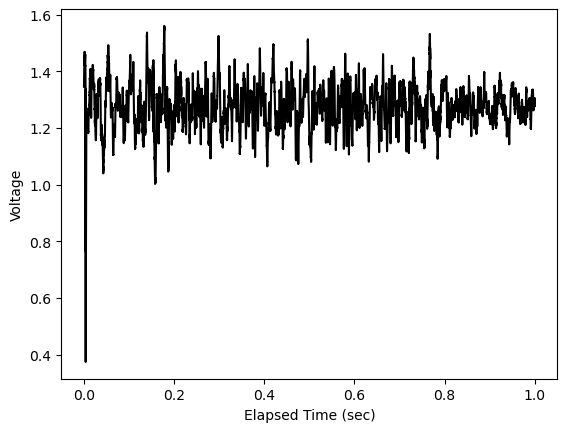

In [90]:
plt.figure()
plt.plot(apres_data.travel_time/1e6,apres_data.data[0,1,:],'k')
plt.ylabel('Voltage')
plt.xlabel('Elapsed Time (sec)');

In [41]:
apres_data.data.shape

(1, 40, 40001)

In [26]:
apres_data.apres_range(2)


In [27]:
apres_data.data.shape

(1, 40, 19022)

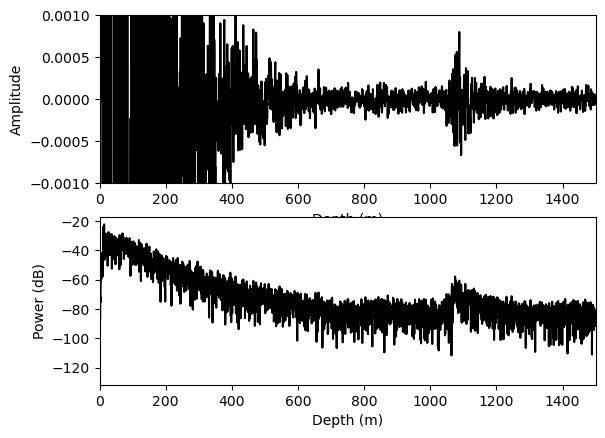

In [8]:
apres_data = load_apres([folder + d1])

apres_data.apres_range(2)

# Plot one chirp from the data file
plt.figure()
# Amplitude
plt.subplot(211)
plt.plot(apres_data.Rcoarse,apres_data.data[0][0],'k')
plt.xlim(0,1500)
plt.ylim(-.001,.001)
plt.ylabel('Amplitude')
plt.xlabel('Depth (m)')
# Power
plt.subplot(212)
plt.plot(apres_data.Rcoarse,10.*np.log10(apres_data.data[0][0]**2.),'k')
plt.xlim(0,1500)
plt.ylabel('Power (dB)');
plt.xlabel('Depth (m)');

In [4]:
apres_data = load_apres([folder + d1])
# Pulse compression
apres_data.apres_range(2,max_range=4000)

In [5]:
apres_data.print_data_summary()







 ### File Data ###: 


snum :  19022
cnum :  40
bnum :  1
data :  [[[-1.97818855e-04+0.00000000e+00j -1.93024196e-04-1.65712612e-05j
   -1.78208774e-04-4.56093350e-05j ... -9.37653660e-06+3.39046326e-05j
    2.23867988e-05+3.59535179e-05j  3.61264888e-05+5.92934921e-05j]
  [-5.21867296e-05+0.00000000e+00j -5.12821136e-05-1.71349202e-06j
   -4.91015736e-05-7.00470081e-06j ... -1.44527312e-05-4.38615036e-06j
   -1.16888920e-05-2.92525929e-06j -8.81923512e-06+5.46069684e-06j]
  [ 3.06091839e-04+0.00000000e+00j  2.67749350e-04-2.77860534e-05j
    1.64144039e-04-3.52220527e-05j ...  3.32599372e-05-2.13601197e-04j
    7.28211676e-06-1.91132623e-04j -2.26031814e-05-1.28719032e-04j]
  ...
  [ 1.04796961e-04+0.00000000e+00j  9.28660278e-05-2.15351842e-05j
    5.70865822e-05-2.36732685e-05j ...  1.16410882e-08-1.84892502e-06j
   -3.70718044e-08-5.47937724e-07j -4.39878914e-06-2.44312784e-06j]
  [ 9.15935995e-05+0.00000000e+00j  8.05260045e-05-6.69727009e-05j
    3.29912199e-05-7.40276312e-

In [6]:
apres_data.Rcoarse

array([0.00000000e+00, 2.10287957e-01, 4.20575913e-01, ...,
       3.99946665e+03, 3.99967693e+03, 3.99988722e+03])